In [12]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [13]:
# Define global variables
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}
SEED = 17

In [2]:
# Read data
nsfg = pd.read_hdf(r'datasets/nsfg.hdf5')
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


# 1. Read, clean, and validate

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.

# <font color=darkred>1.1 DataFrames and Series</font>

1. Dataframes and Series
>Welcome to Exploratory Data Analysis in Python! I'm Allen Downey and I'll be your instructor. The goal of exploratory data analysis is to use data to answer questions and guide decision making.

2. Using data to answer questions
>As a first example, we'll start with a simple question: what is the average birth weight of babies in the United States? To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it. Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

3. National Survey of Family Growth (NSFG)
>For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics. The 2013-2015 dataset includes information about a representative sample of women in the U.S. and their children.

4. Reading data
>The Python module we'll use to read and analyze data is Pandas, which we'll import as `pd`. Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5. The result from read_hdf() is a DataFrame, which is the primary data structure Pandas uses to store data.

5. Reading data
>head() shows the first 5 rows of the DataFrame, which contains one row for each pregnancy for each of the women who participated in the survey, and one column for each variable.

6. Columns and rows
>The DataFrame has an attribute called shape, which is the number of rows and columns; there are 9358 rows in this dataset, one for each pregnancy, and 10 columns, one for each variable. The DataFrame also has an attribute called `columns`, which is an Index. That's another Pandas data structure, similar to a list; in this case it's a list of variables names, which are strings. Based on the names, you might be able to guess what some of the variables are, but in general you have to read the documentation.

7. Columns and rows
>This figure shows an entry from the codebook for birthwgt_lb1, which is the weight in pounds of the first baby from this pregnancy, for cases of live birth.

8. Each column is a Series
>In many ways a DataFrame is like a Python dictionary, where the variable names are the keys and the columns are the values. You can select a column from a DataFrame using the bracket operator, with a string as the key. The result is a Series, which is another Pandas data structure. In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

9. Each column is a series
>head() shows the first five values in the series, the name of the series, and the datatype; float64 means that these values are 64-bit floating-point numbers. Notice that one of the values is NaN, which stands for "Not a Number". NaN is a special value that can indicate invalid or missing data. In this example, the pregnancy did not end in live birth, so birth weight is inapplicable.

10. Let's start exploring!
>Let's start exploring this data by working on some exercises.

In [3]:
# Reading data
print(type(nsfg))
print(nsfg.shape)
print(nsfg.columns)

# Each column is a Series
pounds = nsfg['birthwgt_lb1']
print(type(pounds))

<class 'pandas.core.frame.DataFrame'>
(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
<class 'pandas.core.series.Series'>


# <font color=darkred>1.2 Read the codebook</font>

**Instructions**

When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":
<img src="images/chapter-1-2.png"/>

**Possible Answers**
- <font color=red>1</font>
- 35
- 48-49
- 2967

**Results**

<font color=darkgreen>You got it. Remember, the codebook is your friend!</font>

# <font color=darkred>1.3 Exploring the NSFG data</font>

To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.

**Instructions**

- Calculate the number of rows and columns in the DataFrame nsfg.
- Display the names of the columns in nsfg.
- Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.
- Display the first 5 elements of ounces.

**Results**

<font color=darkgreen>Nice job! Remember these attributes and methods; they are useful when you are exploring a new dataset. It's now time to check for errors and prepare the data for analysis. Keep going!</font>

In [4]:
# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
ounces.head()

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

# <font color=darkred>1.4 Clean and Validate</font> 

1. Clean and Validate
>In the previous lesson, we read data from the National Survey of Family Growth and selected a column from a DataFrame. In this lesson, we'll check for errors and prepare the data for analysis.

2. Selecting columns
>We'll use the same DataFrame we used in the previous lesson, nsfg, which contains one row for each pregnancy in the survey. I'll select the variable birthwgt_lb1, which contains the pound part of birth weight, and assign it to pounds. And birthwgt_oz1 contains the ounce part of birth weight, so I'll assign that to ounces.

3. Value counts
>Before we do anything with this data, we have to validate it. One part of validation is confirming that we are interpreting the data correctly. We can use value_counts() to see what values appear in pounds and how many times each value appears. By default, the results are sorted with the most frequent value first, so I use sort_index() to sort them by value instead, with the lightest babies first and heaviest babies last. As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two values, 98, and 99, that indicate missing data.

4. Value counts
>We can validate the results by comparing them to the codebook, which lists the values and their frequencies. The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

5. Describe
>Another way to validate the data is with describe(), which computes summary statistics like the mean, standard deviation, min, and max. Here are the results for pounds. count is the number of values. The minimum and maximum values are 0 and 99, and the 50th percentile, which is the median, is 7. The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. Before we can really compute the mean, we have to replace those values with NaN to represent missing data.

6. Replace
>The replace() method does what we want; it takes a list of values we want to replace and the value we want to replace them with. np dot nan means we are getting the special value NaN from the NumPy library, which is imported as np. The result from replace() is a new Series, which I assign back to pounds. Remember that the mean of the original series was about 8 point 05 pounds. The mean of the new series is about 6 point 7 pounds. It makes a big difference when you remove a few 99-pound babies! Instead of making a new Series, you can call replace() with inplace=True, which modifies the existing Series "in place", that is, without making a copy. Here's what that looks like for ounces. Since we didn't make a new series, we don't have to assign it back to ounces.

7. Arithmetic with Series
>Now we want to combine pounds and ounces into a single Series that contains total birth weight. Arithmetic operators work with Series objects; so, to convert from ounces to pounds, we can divide by 16 (there are 16 ounces in a pound). Then we can add the two Series objects to get the total. Here are the results. The mean is about 7 point 1, which is a little more than what we got before we added in the ounces part. Now we're close to answering our original question, the average birth weight for babies in the U.S., but as we'll see in the next lesson, we're not there yet.

8. Let's practice!
>Let's first practice what we learned in this video.

In [5]:
# Selecting columns
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

## Reviewing the data cook book

|BIRTHWGT_LB1|BIRTHWGT_OZ1|
|-|-|
|<img src="images/BIRTHWGT_LB1.png"/>|<img src="images/BIRTHWGT_OZ1.png"/>|

In [6]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [7]:
# Fixing to get the correct values
#pounds = pounds.replace([98, 99], np.nan)
pounds.replace([98, 99], np.nan, inplace=True)
ounces.replace([98, 99], np.nan, inplace=True)

print(pounds.mean())

# Arithmetic with Series
birth_weight = pounds + (ounces / 16.0)
birth_weight.describe()

6.703286384976526


count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

# <font color=darkred>1.5 Validate a variable</font>

**Instructions**

In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

|value|label|
|-|-|
|1|Live birth|
|2|Induced abortion|
|3|Stillbirth|
|4|Miscarriage|
|5|Ectopic pregnancy|
|6|Current pregnancy|

<img src="images/OUTCOME(311-311).png"/>

The nsfg DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: How many pregnancies in this dataset ended with a live birth?

**Possible Answers**

- <font color=red>6489</font>
- 9538
- 1469
- 6

**Results**

<font color=darkgreen>Correct! By comparing your results with the codebook, you confirm you are interpreting the data correctly.</font>

In [8]:
nsfg.outcome.value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

# <font color=darkred>1.6 Clean a variable</font> 

In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace() method:

<code>ounces.replace([98, 99], np.nan, inplace=True)</code>

<img src="images/NBRNALIV(16-16).png"/>

**Instructions**
- In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
- Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.

**Results**

<font color=darkgreen>Excellent. If you are careful about this kind of cleaning and validation, it will save time (in the long run) and avoid potentially serious errors.</font>

In [9]:
nsfg.nbrnaliv.value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [10]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


# <font color=darkred>1.7 Compute a variable</font> 

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

|AGECON(326-329)|AGEPREG(318-321)|
|-|-|
|<img src="images/AGECON(326-329).png"/>|<img src="images/AGEPREG(318-321).png"/>|

**Instructions**
- Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.
- Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.
- Use .describe() to compute the mean duration and other summary statistics.

**Results**

<font color=darkgreen>Good job. A variable that's computed from other variables is sometimes called a 'recode'. It's now time to get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.? See you in the next video!</font>

In [11]:
# Select the columns and divide by 100
agecon = nsfg.agecon/100
agepreg = nsfg.agepreg/100

# Compute the difference
preg_length = (agepreg - agecon) * 12
print('Pregnancy Duration Average: {:0.2f} months'.format(preg_length.mean()))

# Compute summary statistics
print(preg_length.describe())

Pregnancy Duration Average: 6.62 months
count    9109.000000
mean        6.624833
std         3.257754
min         0.000000
25%         3.000000
50%         8.040000
75%         9.000000
max        11.040000
dtype: float64


# <font color=darkred>1.8 Filter and visualize</font> 

1. Filter and Visualize
>Let's get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.?

2. Histogram
>In the previous lesson, we used data from the NSFG to compute birth weight in pounds and we stored the result in a Series called birth_weight. Let's see what the distribution of those values looks like. We'll use the pyplot submodule from the matplotlib visualization library, which we import as plt. Pyplot provides hist(), which takes a Series and plots a histogram; that is, it shows the values and how often they appear. However, pyplot doesn't work with NaNs, so we have to use dropna(), which makes a new Series that contains only the valid values. The second argument, bins, tells hist to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin. hist() takes other arguments that specify the type and appearance of the histogram; you will have a chance to explore these options in the next exercise. To label the axes we'll use xlabel() and ylabel(), and finally, to display the plot, we'll use plt dot show().

3. Histogram
>And here's what the results look like. The x-axis is birth weight in pounds, divided into 30 bins. The y-axis is the number of births in each bin. The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

4. Boolean Series
>To see which babies are preterm, we can use the prglngth column, which records pregnancy length in weeks. When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. In this case, it's True for each preterm baby and False otherwise. We can use head() to see the first 5 elements.

5. Boolean Series
>If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700. If you compute the mean, you get the fraction of Trues; in this case, it's close to 0.4; that is, about 40% of the births in this dataset are preterm.

6. Filtering
>We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion. For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies. To select full-term babies, we can use the tilde operator, which is "logical NOT" or inverse; it makes the Trues false and the Falses true. Not surprisingly, full term babies are heavier, on average, than preterm babies.

7. Filtering
>If you have two Boolean Series, you can use logical operators to combine them; ampersand is the logical AND operator, and the vertical bar or pipe is logical OR.

8. Resampling
>There's one more thing we have to do before we can answer our question: resampling. The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are "oversampled". Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling. I won't get into the details here, but I have provided a function called resample_rows_weighted() that you can use for the exercises. If you are interested in learning more about resampling, check out DataCamp's statistics courses.

9. Finish it off!
>Now we have everything we need to answer the motivating question. Let's get to it.

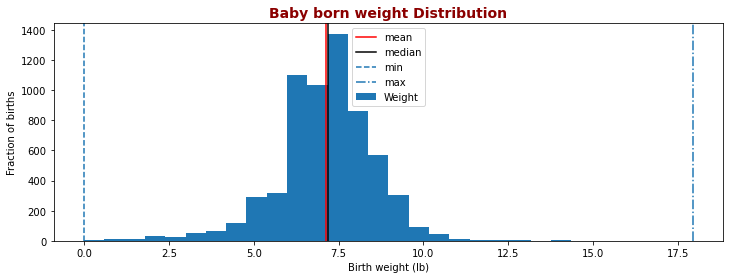

In [37]:
fig = plt.figure(figsize=(12,4))
plt.hist(birth_weight.dropna(), bins=30, label='Weight')
plt.axvline(birth_weight.mean(), color='red', label='mean')
plt.axvline(birth_weight.median(), color='black', label='median')
plt.axvline(birth_weight.min(), linestyle='--', label='min')
plt.axvline(birth_weight.max(), linestyle='-.', label='max')

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.title("Baby born weight Distribution", **title_param)
plt.legend()
plt.show()

<img src="images/prglngth.png"/>

In [39]:
# Boolean Series
preterm = nsfg['prglngth'] < 37

print("Preterm born babies: ", preterm.sum())
print("Preterm born babies (fraction): ", preterm.mean())

Preterm born babies:  3742
Preterm born babies (fraction):  0.39987176747168196


In [41]:
# Filtering
preterm_weight = birth_weight[preterm]
print("Weight preterm born babies average: ", preterm_weight.mean())
full_term_weight = birth_weight[~preterm]
print("Weight full born babies average   : ", full_term_weight.mean())

Weight preterm born babies average:  5.577598314606742
Weight full born babies average   :  7.372323879231473


# <font color=darkred>1.9 Make a histogram</font> 

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">here</a> in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's <a href="https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/read-clean-and-validate?ex=9#:~:text=Histograms%20are%20one,to%20Matplotlib%20course">Introduction to Matplotlib</a> course.

<img src="images/AGECON(326-329).png"/>

**Instructions**
- Plot a histogram of agecon with 20 bins.
- Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

**Results**

<font color=darkgreen>Nice job! matplotlib functions provide a lot of options; be sure to read the documentation so you know what they can do.</font>

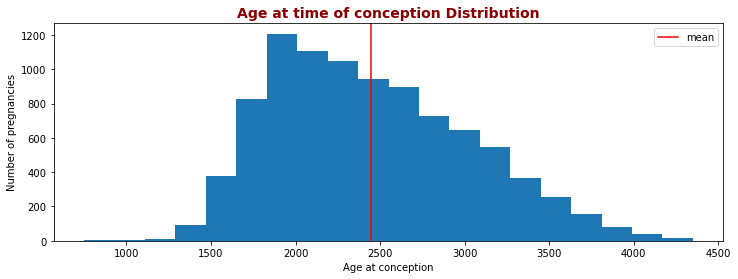

In [44]:
# Plot the histogram
fig = plt.figure(figsize=(12,4))
plt.hist(nsfg.agecon, bins=20)
plt.axvline(nsfg.agecon.mean(), color='red', label='mean')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.title("Age at time of conception Distribution", **title_param)
plt.legend()
plt.show()

# Show the figure
plt.show()

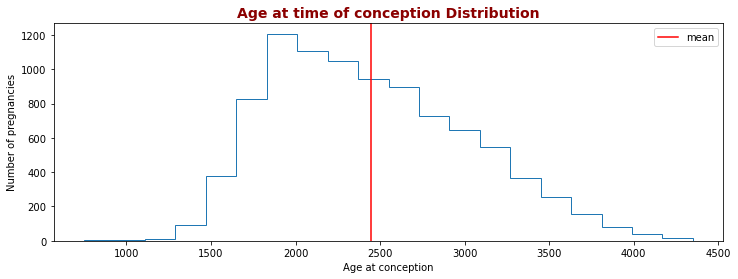

In [45]:
# Plot the histogram
fig = plt.figure(figsize=(12,4))
plt.hist(nsfg.agecon, bins=20, histtype='step')
plt.axvline(nsfg.agecon.mean(), color='red', label='mean')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.title("Age at time of conception Distribution", **title_param)
plt.legend()
plt.show()

# Show the figure
plt.show()

# <font color=darkred>1.10 Compute birth weight</font> 

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

<code>
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)
# Compute total birth weight
birth_weight = pounds + ounces/16
</code>

**Instructions**
- Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
- Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
- Compute the mean weight of full-term babies.

**Results**

<font color=darkgreen>Nice job. You're almost done, but there's one last thing we have to check...</font>

In [46]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

<img src='images/wgt2013_2015.png'/>

In [53]:
# Read data
nsfg = pd.read_hdf(r'datasets/nsfg.hdf5')

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')


# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [54]:
# Create a Boolean Series for full-term babies
full_term = nsfg.prglngth >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight [full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


# <font color=darkred>1.11 Filter</font> 

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

**Instructions**
- Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
- Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
- For comparison, select multiple, full-term babies and compute their mean birth weight.

**Results**

<font color=darkgreen>Congratulations on completing Chapter 1! Now that we have clean data, we're ready to explore. Coming up in Chapter 2, we'll look at distributions of variables in the General Social Survey and explore the relationship between education and income.</font>

|prglngth|NBRNALIV(16-16)|
|-|-|
|<img src='images/prglngth.png'/>|<img src='images/NBRNALIV(16-16).png'/>|

In [55]:
# Clean the multiple births variables
pounds = nsfg['birthwgt_lb1'].replace([8], np.nan)

# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222


# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/exploratory-data-analysis-in-python